<h1 align="center" style="color: brown;">TAREA 09 UNIDAD 4</h1>

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha de entrega:** 

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

<h3 align="center" style="color: brown;">ELIMINACIÓN GAUSSIANA</h3>

### Ejercicio 1

Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination(a, b, tol=1e-10):
    a = a.astype(float)
    b = b.astype(float)
    n = len(b)
    Ab = np.hstack([a, b.reshape(-1, 1)])

    # Eliminación hacia adelante
    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]

        if abs(Ab[i, i]) < tol:
            continue

        for j in range(i+1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]

    # Verificación del tipo de solución
    rango_a = np.sum([not np.all(np.abs(row[:-1]) < tol) for row in Ab])
    rango_ab = np.sum([not np.all(np.abs(row) < tol) for row in Ab])

    if rango_a < rango_ab:
        print("El sistema no tiene solución.")
        return None
    elif rango_a < n:
        print("El sistema tiene infinitas soluciones.")
        return None
    else:
        # Sustitución regresiva
        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            if abs(Ab[i, i]) < tol:
                x[i] = 0
                continue
            suma = sum(Ab[i, j] * x[j] for j in range(i+1, n))
            x[i] = (Ab[i, -1] - suma) / Ab[i, i]
        return x

def resolver_minimos_cuadrados(a, b):
    x, residuals, rank, s = np.linalg.lstsq(a, b, rcond=None)
    return x

def graficar_sistema(a, b):
    m, n = a.shape
    if n != 2:
        print("Solo se puede graficar sistemas con 2 incógnitas.")
        return

    x_vals = np.linspace(-10, 10, 400)

    # === Tema oscuro ===
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(9,7))
    fig.patch.set_facecolor('#121212')  # Fondo figura
    ax.set_facecolor('#1e1e1e')         # Fondo área gráfica

    # Colores vistosos para cada ecuación
    colores = ['#ff6f61', '#6ec6ff', '#ffd54f', '#81c784', '#ba68c8']

    for i in range(m):
        color = colores[i % len(colores)]
        if abs(a[i, 1]) > 1e-12:
            y = (b[i] - a[i, 0]*x_vals) / a[i, 1]
            ax.plot(x_vals, y, label=f"Ecuación {i+1}",
                    color=color, linewidth=2)
        else:
            x_const = b[i] / a[i, 0]
            ax.axvline(x_const, label=f"Ecuación {i+1}",
                       color=color, linestyle='--', linewidth=2)

    ax.set_xlabel("x", fontsize=14, color='white')
    ax.set_ylabel("y", fontsize=14, color='white')
    ax.set_title(f"Gráfica del sistema {m}x2", fontsize=16, color='white')

    # Líneas de los ejes
    ax.axhline(0, color='gray', lw=1, linestyle='--')
    ax.axvline(0, color='gray', lw=1, linestyle='--')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.grid(True, color='gray', linestyle=':', linewidth=0.6)
    ax.legend(facecolor='#333333', edgecolor='white', fontsize=12)

    plt.tight_layout()
    plt.show()


$x_1 + 2x_2 = 0$

$x_1 - x_2 = 0$

Solución: [ 0. -0.]


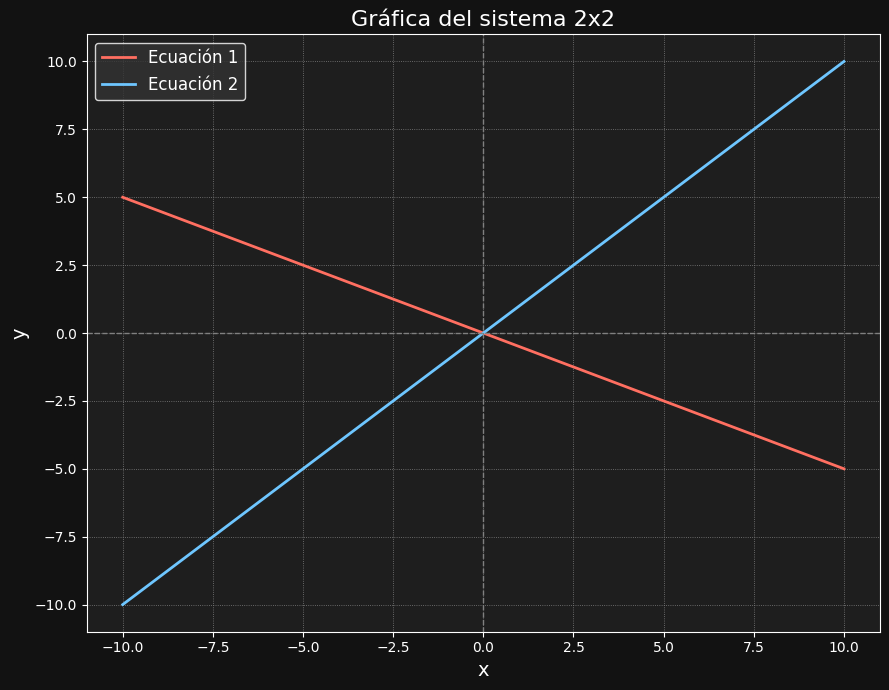

In [2]:
A = np.array([[1, 2],
              [1, -1]])
b = np.array([0, 0])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)


$x_1 + 2x_2 = 3$

$-2x_1 - 4x_2 = 6$

El sistema no tiene solución.


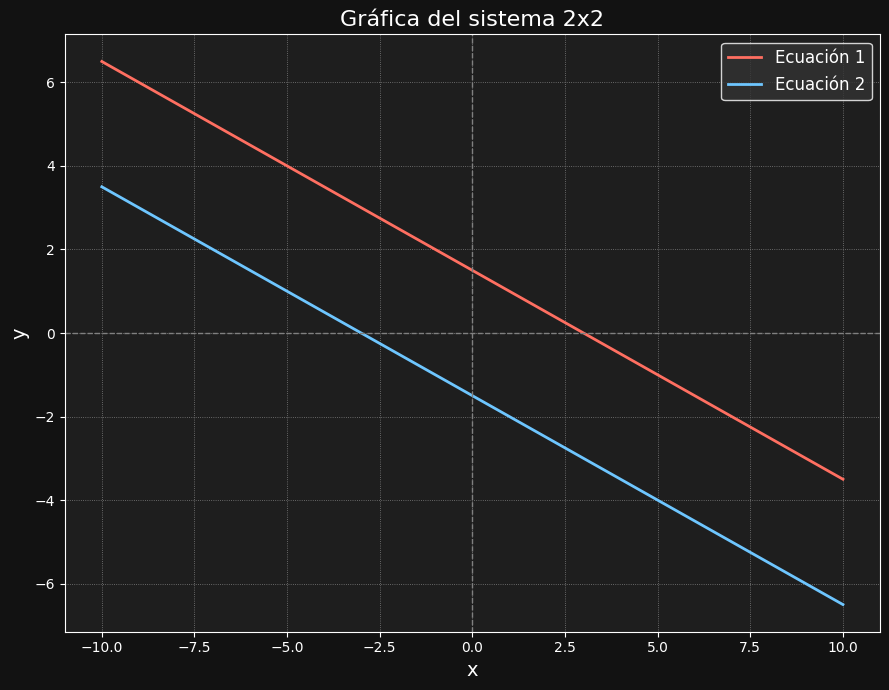

In [3]:
A = np.array([[1, 2],
              [-2, -4]])

b = np.array([3, 6])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)


$2x_1 + x_2 = -1$

$x_1 + x_2 = 2$

$x_1 - 3x_2 = 5$

El sistema no tiene solución.


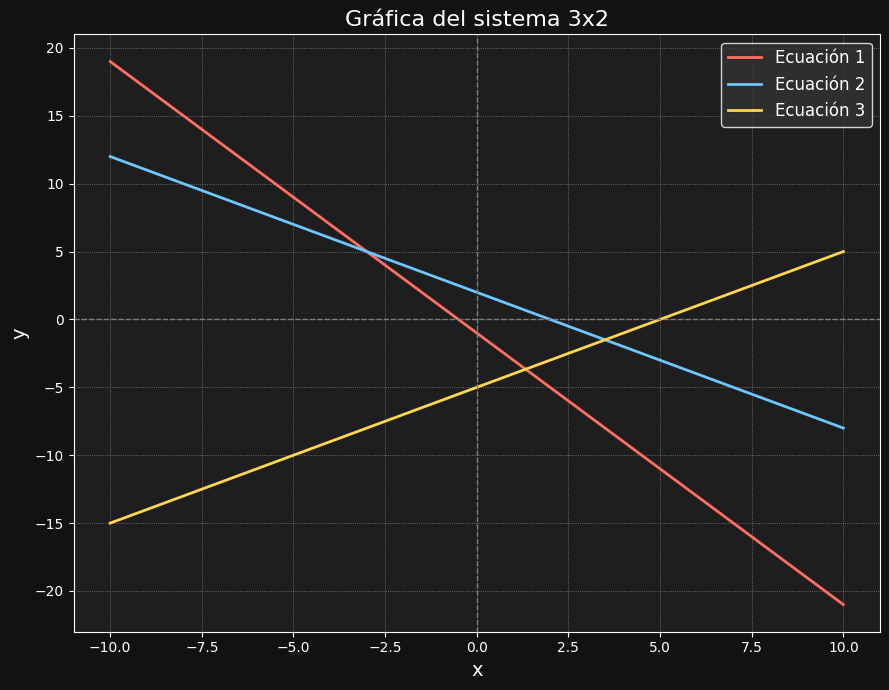

In [4]:
A = np.array([[2, 1],
              [1, 1],
              [1, -1]])

b = np.array([-1, 2, 5])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)

$2x_1 + x_2 + x_3 = 1$

$2x_1 + 4x_2 - x_3 = -1$

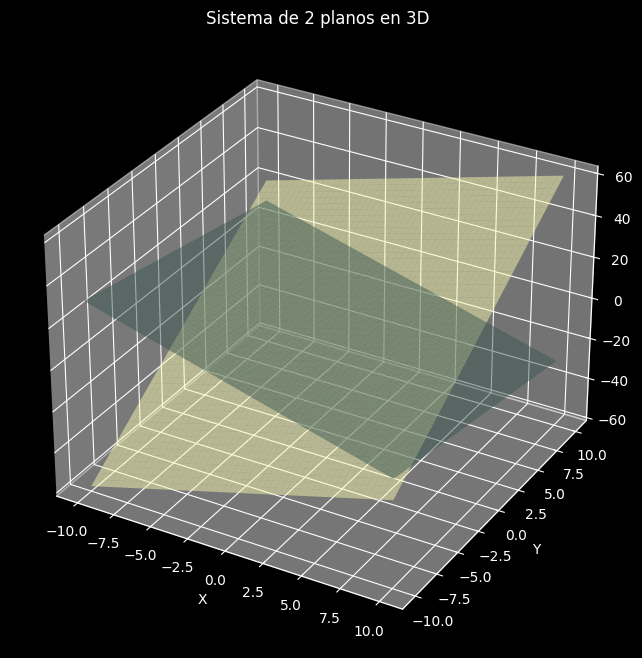

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graficar_sistema_3d(a, b):
    m, n = a.shape
    if n != 3:
        print("Solo se puede graficar sistemas con 3 incógnitas.")
        return

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    # Definir rango para x,y
    x = np.linspace(-10, 10, 50)
    y = np.linspace(-10, 10, 50)
    X, Y = np.meshgrid(x, y)

    for i in range(m):
        if abs(a[i, 2]) > 1e-12:
            # z = (d - ax - by) / c
            Z = (b[i] - a[i, 0]*X - a[i, 1]*Y) / a[i, 2]
            ax.plot_surface(X, Y, Z, alpha=0.5, label=f'Plano {i+1}')
        else:
            print(f"No se puede graficar el plano {i+1} (coeficiente de z=0).")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Sistema de {m} planos en 3D')
    plt.show()

A = np.array([[2, 1,1],
              [2, 4,-1]])

b = np.array([1, -1])

graficar_sistema_3d(A, b)


### Ejercicio 2

Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver
los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥1 = −1,
𝑥2 = 2, 𝑥3 = 3.)


In [6]:
import numpy as np

# Función para eliminación gaussiana con redondeo y visualización paso a paso
def gauss_elimination_with_rounding_verbose(A, b, decimals=2):
    A = A.copy()
    b = b.copy()
    n = len(b)
    steps = []

    # Eliminación hacia adelante
    for k in range(n):
        steps.append(f"\nPaso {k+1}: Eliminar términos debajo del pivote en columna {k}")
        for i in range(k+1, n):
            factor = round(A[i, k] / A[k, k], decimals)
            row_before = A[i].copy()
            for j in range(k, n):
                A[i, j] = round(A[i, j] - factor * A[k, j], decimals)
            b[i] = round(b[i] - factor * b[k], decimals)
            steps.append(
                f"Fila {i} = Fila {i} - ({factor}) * Fila {k} → {row_before} → {A[i]}, b[{i}] = {b[i]}"
            )

    # Sustitución hacia atrás
    x = np.zeros(n)
    steps.append("\nSustitución hacia atrás:")
    for i in range(n-1, -1, -1):
        sum_ax = round(sum(A[i, j] * x[j] for j in range(i+1, n)), decimals)
        x[i] = round((b[i] - sum_ax) / A[i, i], decimals)
        steps.append(f"x[{i}] = ({b[i]} - {sum_ax}) / {A[i, i]} = {x[i]}")

    return x, steps

$-x_1 + 4x_2 + x_3 = 8$

$\frac{5}{3}x_1 + \frac{2}{3}x_2 - \frac{2}{3}x_3 = 1$

$2x_1 + x_2 + 4x_3 = 11$

In [7]:
# Sistema a
A_a = np.array([
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
], dtype=float)
b_a = np.array([8, 1, 11], dtype=float)

# Resolver sistema a
sol_a, steps_a = gauss_elimination_with_rounding_verbose(A_a, b_a)
print("=== Sistema a ===")
for step in steps_a:
    print(step)
print("Solución aproximada (a):", sol_a)

=== Sistema a ===

Paso 1: Eliminar términos debajo del pivote en columna 0
Fila 1 = Fila 1 - (-1.67) * Fila 0 → [1.66666667 0.66666667 0.66666667] → [-0.    7.35  2.34], b[1] = 14.36
Fila 2 = Fila 2 - (-2.0) * Fila 0 → [2. 1. 4.] → [0. 9. 6.], b[2] = 27.0

Paso 2: Eliminar términos debajo del pivote en columna 1
Fila 2 = Fila 2 - (1.22) * Fila 1 → [0. 9. 6.] → [0.   0.03 3.15], b[2] = 9.48

Paso 3: Eliminar términos debajo del pivote en columna 2

Sustitución hacia atrás:
x[2] = (9.48 - 0) / 3.15 = 3.01
x[1] = (14.36 - 7.04) / 7.35 = 1.0
x[0] = (8.0 - 7.01) / -1.0 = -0.99
Solución aproximada (a): [-0.99  1.    3.01]


In [8]:
# Sistema b
A_b = np.array([
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
], dtype=float)
b_b = np.array([-5, -1, 9], dtype=float)

sol_b, steps_b = gauss_elimination_with_rounding_verbose(A_b, b_b)
print("\n=== Sistema b ===")
for step in steps_b:
    print(step)
print("Solución aproximada (b):", sol_b)


=== Sistema b ===

Paso 1: Eliminar términos debajo del pivote en columna 0
Fila 1 = Fila 1 - (0.03) * Fila 0 → [ 0.11111111  0.11111111 -0.33333333] → [-0.01  0.05 -0.3 ], b[1] = -0.85
Fila 2 = Fila 2 - (0.25) * Fila 0 → [1. 4. 2.] → [0.   3.5  2.25], b[2] = 10.25

Paso 2: Eliminar términos debajo del pivote en columna 1
Fila 2 = Fila 2 - (70.0) * Fila 1 → [0.   3.5  2.25] → [ 0.    0.   23.25], b[2] = 69.75

Paso 3: Eliminar términos debajo del pivote en columna 2

Sustitución hacia atrás:
x[2] = (69.75 - 0) / 23.25 = 3.0
x[1] = (-0.85 - -0.9) / 0.05 = 1.0
x[0] = (-5.0 - -1.0) / 4.0 = -1.0
Solución aproximada (b): [-1.  1.  3.]


### Ejercicio 3

Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y
determine si se necesitan intercambios de fila:

$x_1 - x_2 + 3x_3 = 2$

$3x_1 - 3x_2 + x_3 = -1$

$x_1 + x_2 = 3$

In [12]:
import numpy as np

# Sistema a
A_a = np.array([
    [1, -1, 3, 2],
    [3, -3, 1, -1],
    [1, 1, 0, 3]
], dtype=float)

print("Sistema original a:")
print(A_a)

n = len(A_a)
for k in range(n-1):
    # Pivoteo parcial
    if A_a[k,k] == 0:
        for i in range(k+1, n):
            if A_a[i,k] != 0:
                A_a[[k,i]] = A_a[[i,k]]  # Intercambio de filas
                print(f"\nIntercambio fila {k+1} con fila {i+1}")
                print(A_a)
                break
    
    for i in range(k+1, n):
        factor = A_a[i,k] / A_a[k,k]
        A_a[i,k:] -= factor * A_a[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_a)

# Sustitución hacia atrás
x_a = np.zeros(n)
for i in range(n-1, -1, -1):
    x_a[i] = (A_a[i,n] - np.dot(A_a[i,i+1:n], x_a[i+1:n])) / A_a[i,i]

print("\nSolución para a:")
print(f"x₁ = {x_a[0]}, x₂ = {x_a[1]}, x₃ = {x_a[2]}")

Sistema original a:
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]

Paso 1:
[[ 1. -1.  3.  2.]
 [ 0.  0. -8. -7.]
 [ 0.  2. -3.  1.]]

Intercambio fila 2 con fila 3
[[ 1. -1.  3.  2.]
 [ 0.  2. -3.  1.]
 [ 0.  0. -8. -7.]]

Paso 2:
[[ 1. -1.  3.  2.]
 [ 0.  2. -3.  1.]
 [ 0.  0. -8. -7.]]

Solución para a:
x₁ = 1.1875, x₂ = 1.8125, x₃ = 0.875


$2x_1 - 1.5x_2 + 3x_3 = 1$

$-x_1 + 2x_3 = 3$

$4x_1 - 4.5x_2 + 5x_3 = 1$

In [11]:
# Sistema b
A_b = np.array([
    [2, -1.5, 3, 1],
    [-1, 0, 2, 3],
    [4, -4.5, 5, 1]
], dtype=float)

print("\nSistema original b:")
print(A_b)

n = len(A_b)
for k in range(n-1):
    # Pivoteo parcial
    if A_b[k,k] == 0:
        for i in range(k+1, n):
            if A_b[i,k] != 0:
                A_b[[k,i]] = A_b[[i,k]]
                print(f"\nIntercambio fila {k+1} con fila {i+1}")
                print(A_b)
                break
    
    for i in range(k+1, n):
        factor = A_b[i,k] / A_b[k,k]
        A_b[i,k:] -= factor * A_b[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_b)

# Sustitución hacia atrás
x_b = np.zeros(n)
for i in range(n-1, -1, -1):
    x_b[i] = (A_b[i,n] - np.dot(A_b[i,i+1:n], x_b[i+1:n])) / A_b[i,i]

print("\nSolución para b:")
print(f"x₁ = {x_b[0]}, x₂ = {x_b[1]}, x₃ = {x_b[2]}")


Sistema original b:
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]

Paso 1:
[[ 2.   -1.5   3.    1.  ]
 [ 0.   -0.75  3.5   3.5 ]
 [ 0.   -1.5  -1.   -1.  ]]

Paso 2:
[[ 2.   -1.5   3.    1.  ]
 [ 0.   -0.75  3.5   3.5 ]
 [ 0.    0.   -8.   -8.  ]]

Solución para b:
x₁ = -1.0, x₂ = -0.0, x₃ = 1.0


$2x_1 = 3$

$x_1 + 1.5x_2 = 4.5$

$-3x_2 + 0.5x_3 = -6.6$

$2x_1 - 2x_2 + x_3 + x_4 = 0.8$

In [10]:
A_c = np.array([
    [2, 0, 0, 3],
    [1, 1.5, 0, 4.5],
    [0, -3, 0.5, -6.6]
], dtype=float)

print("\nSistema original c:")
print(A_c)

n = len(A_c)
for k in range(n-1):
    # Pivoteo parcial
    if A_c[k,k] == 0:
        for i in range(k+1, n):
            if A_c[i,k] != 0:
                A_c[[k,i]] = A_c[[i,k]]
                print(f"\nIntercambio fila {k+1} con fila {i+1}")
                print(A_c)
                break
    
    for i in range(k+1, n):
        factor = A_c[i,k] / A_c[k,k]
        A_c[i,k:] -= factor * A_c[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_c)

# Sustitución hacia atrás
x_c = np.zeros(n)
for i in range(n-1, -1, -1):
    x_c[i] = (A_c[i,n] - np.dot(A_c[i,i+1:n], x_c[i+1:n])) / A_c[i,i]

print("\nSolución para c:")
print(f"x₁ = {x_c[0]}, x₂ = {x_c[1]}, x₃ = {x_c[2]}")


Sistema original c:
[[ 2.   0.   0.   3. ]
 [ 1.   1.5  0.   4.5]
 [ 0.  -3.   0.5 -6.6]]

Paso 1:
[[ 2.   0.   0.   3. ]
 [ 0.   1.5  0.   3. ]
 [ 0.  -3.   0.5 -6.6]]

Paso 2:
[[ 2.   0.   0.   3. ]
 [ 0.   1.5  0.   3. ]
 [ 0.   0.   0.5 -0.6]]

Solución para c:
x₁ = 1.5, x₂ = 2.0, x₃ = -1.1999999999999993


$x_1 + x_2 + x_4 = 2$

$2x_1 + x_2 - x_3 + x_4 = 1$

$4x_1 - x_2 - 2x_3 + 2x_4 = 0$

$3x_1 - x_2 - x_3 + 2x_4 = -3$

In [9]:
A_d = np.array([
    [1, 1, 0, 1, 2],
    [2, 1, -1, 1, 1],
    [4, -1, -2, 2, 0],
    [3, -1, -1, 2, -3]
], dtype=float)

print("\nSistema original d:")
print(A_d)

n = len(A_d)
for k in range(n-1):
    # Pivoteo parcial
    if A_d[k,k] == 0:
        for i in range(k+1, n):
            if A_d[i,k] != 0:
                A_d[[k,i]] = A_d[[i,k]]
                print(f"\nIntercambio fila {k+1} con fila {i+1}")
                print(A_d)
                break
    
    for i in range(k+1, n):
        factor = A_d[i,k] / A_d[k,k]
        A_d[i,k:] -= factor * A_d[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_d)

# Sustitución hacia atrás
x_d = np.zeros(n)
for i in range(n-1, -1, -1):
    x_d[i] = (A_d[i,n] - np.dot(A_d[i,i+1:n], x_d[i+1:n])) / A_d[i,i]

print("\nSolución para d:")
print(f"x₁ = {x_d[0]}, x₂ = {x_d[1]}, x₃ = {x_d[2]}, x₄ = {x_d[3]}")


Sistema original d:
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2.  0.]
 [ 3. -1. -1.  2. -3.]]

Paso 1:
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0. -5. -2. -2. -8.]
 [ 0. -4. -1. -1. -9.]]

Paso 2:
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  3.  3.  3.]]

Paso 3:
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  0.  0. -4.]]

Solución para d:
x₁ = nan, x₂ = nan, x₃ = inf, x₄ = -inf


C:\Users\CORE I5\AppData\Local\Temp\ipykernel_17968\4028547776.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  x_d[i] = (A_d[i,n] - np.dot(A_d[i,i+1:n], x_d[i+1:n])) / A_d[i,i]


### Ejercicio 4

Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los
siguientes sistemas lineales.

In [13]:
import numpy as np

# Configurar precisión simple (32 bits)
np.set_printoptions(precision=7, suppress=True)
dtype = np.float32

def print_solution(x, label):
    print(f"\nSolución para {label}:")
    for i in range(len(x)):
        print(f"x_{i+1} = {x[i]:.7f}")

$-\frac{1}{6}x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 = 9$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8$

$-\frac{1}{2}x_1 + x_2 + 2x_3 = 8$

In [14]:
A_a = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], dtype=dtype)

print("Sistema original a:")
print(A_a)

# Eliminación gaussiana con pivoteo parcial
n = len(A_a)
for k in range(n-1):
    # Pivoteo parcial
    max_row = np.argmax(np.abs(A_a[k:, k])) + k
    if max_row != k:
        A_a[[k, max_row]] = A_a[[max_row, k]]
        print(f"\nIntercambio fila {k+1} con fila {max_row+1}")
        print(A_a)
    
    for i in range(k+1, n):
        factor = A_a[i,k] / A_a[k,k]
        A_a[i,k:] -= factor * A_a[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_a)

# Sustitución hacia atrás
x_a = np.zeros(n, dtype=dtype)
for i in range(n-1, -1, -1):
    x_a[i] = (A_a[i,n] - np.dot(A_a[i,i+1:n], x_a[i+1:n])) / A_a[i,i]

print_solution(x_a, "a")

Sistema original a:
[[0.25      0.2       0.1666667 9.       ]
 [0.3333333 0.25      0.2       8.       ]
 [0.5       1.        2.        8.       ]]

Intercambio fila 1 con fila 3
[[0.5       1.        2.        8.       ]
 [0.3333333 0.25      0.2       8.       ]
 [0.25      0.2       0.1666667 9.       ]]

Paso 1:
[[ 0.5        1.         2.         8.       ]
 [ 0.        -0.4166667 -1.1333333  2.6666665]
 [ 0.        -0.3       -0.8333333  5.       ]]

Paso 2:
[[ 0.5        1.         2.         8.       ]
 [ 0.        -0.4166667 -1.1333333  2.6666665]
 [ 0.         0.        -0.0173333  3.0800002]]

Solución para a:
x_1 = -227.0769653
x_2 = 476.9232178
x_3 = -177.6923676


$3.333x_1 + 15920x_2 - 10.333x_3 = 15913$

$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$

$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$

In [15]:
A_b = np.array([
    [3.333, 15920, -10.333, 15913],
    [2.222, 16.71, 9.612, 28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], dtype=dtype)

print("\nSistema original b:")
print(A_b)

# Eliminación gaussiana con pivoteo parcial
n = len(A_b)
for k in range(n-1):
    # Pivoteo parcial
    max_row = np.argmax(np.abs(A_b[k:, k])) + k
    if max_row != k:
        A_b[[k, max_row]] = A_b[[max_row, k]]
        print(f"\nIntercambio fila {k+1} con fila {max_row+1}")
        print(A_b)
    
    for i in range(k+1, n):
        factor = A_b[i,k] / A_b[k,k]
        A_b[i,k:] -= factor * A_b[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_b)

# Sustitución hacia atrás
x_b = np.zeros(n, dtype=dtype)
for i in range(n-1, -1, -1):
    x_b[i] = (A_b[i,n] - np.dot(A_b[i,i+1:n], x_b[i+1:n])) / A_b[i,i]

print_solution(x_b, "b")


Sistema original b:
[[    3.333  15920.       -10.333  15913.    ]
 [    2.222     16.71       9.612     28.544 ]
 [    1.5611     5.1791     1.6852     8.4254]]

Paso 1:
[[     3.333      15920.           -10.333      15913.       ]
 [     0.        -10596.623         16.500668  -10580.122    ]
 [     0.         -7451.3804         6.5249376  -7444.8555   ]]

Paso 2:
[[     3.333      15920.           -10.333      15913.       ]
 [     0.        -10596.623         16.500668  -10580.122    ]
 [     0.             0.            -5.0780745     -5.0786133]]

Solución para b:
x_1 = 0.9997094
x_2 = 1.0000001
x_3 = 1.0001061


$x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}$

$\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}$

$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}$

In [16]:
A_c = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
], dtype=dtype)

print("\nSistema original c:")
print(A_c)

# Eliminación gaussiana con pivoteo parcial
n = len(A_c)
for k in range(n-1):
    # Pivoteo parcial
    max_row = np.argmax(np.abs(A_c[k:, k])) + k
    if max_row != k:
        A_c[[k, max_row]] = A_c[[max_row, k]]
        print(f"\nIntercambio fila {k+1} con fila {max_row+1}")
        print(A_c)
    
    for i in range(k+1, n):
        factor = A_c[i,k] / A_c[k,k]
        A_c[i,k:] -= factor * A_c[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_c)

# Sustitución hacia atrás
x_c = np.zeros(n, dtype=dtype)
for i in range(n-1, -1, -1):
    x_c[i] = (A_c[i,n] - np.dot(A_c[i,i+1:n], x_c[i+1:n])) / A_c[i,i]

print_solution(x_c, "c")


Sistema original c:
[[1.        0.5       0.3333333 0.25      0.1666667]
 [0.5       0.3333333 0.25      0.2       0.1428571]
 [0.3333333 0.25      0.2       0.1666667 0.125    ]
 [0.25      0.2       0.1666667 0.1428571 0.1111111]]

Paso 1:
[[1.        0.5       0.3333333 0.25      0.1666667]
 [0.        0.0833333 0.0833333 0.075     0.0595238]
 [0.        0.0833333 0.0888889 0.0833333 0.0694444]
 [0.        0.075     0.0833333 0.0803571 0.0694444]]

Paso 2:
[[1.        0.5       0.3333333 0.25      0.1666667]
 [0.        0.0833333 0.0833333 0.075     0.0595238]
 [0.        0.        0.0055556 0.0083333 0.0099206]
 [0.        0.        0.0083333 0.0128572 0.015873 ]]

Intercambio fila 3 con fila 4
[[1.        0.5       0.3333333 0.25      0.1666667]
 [0.        0.0833333 0.0833333 0.075     0.0595238]
 [0.        0.        0.0083333 0.0128572 0.015873 ]
 [0.        0.        0.0055556 0.0083333 0.0099206]]

Paso 3:
[[ 1.         0.5        0.3333333  0.25       0.1666667]
 [ 0.      

$2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$

$x_1 + 2x_3 - x_4 + x_5 = 2$

$-2x_2 + x_3 + x_4 - x_5 = -5$

$3x_1 + x_2 - 4x_3 + 5x_5 = 6$

$x_1 - x_2 - x_3 + x_4 + x_5 = -3$

In [17]:
A_d = np.array([
    [2, 1, -1, 1, -3, 7],
    [1, 0, 2, -1, 1, 2],
    [0, -2, -1, 1, -1, -5],
    [3, 1, -4, 0, 5, 6],
    [1, -1, -1, -1, 1, 3]
], dtype=dtype)

print("\nSistema original d:")
print(A_d)

# Eliminación gaussiana con pivoteo parcial
n = len(A_d)
for k in range(n-1):
    # Pivoteo parcial
    max_row = np.argmax(np.abs(A_d[k:, k])) + k
    if max_row != k:
        A_d[[k, max_row]] = A_d[[max_row, k]]
        print(f"\nIntercambio fila {k+1} con fila {max_row+1}")
        print(A_d)
    
    for i in range(k+1, n):
        factor = A_d[i,k] / A_d[k,k]
        A_d[i,k:] -= factor * A_d[k,k:]
    
    print(f"\nPaso {k+1}:")
    print(A_d)

# Sustitución hacia atrás
x_d = np.zeros(n, dtype=dtype)
for i in range(n-1, -1, -1):
    x_d[i] = (A_d[i,n] - np.dot(A_d[i,i+1:n], x_d[i+1:n])) / A_d[i,i]

print_solution(x_d, "d")


Sistema original d:
[[ 2.  1. -1.  1. -3.  7.]
 [ 1.  0.  2. -1.  1.  2.]
 [ 0. -2. -1.  1. -1. -5.]
 [ 3.  1. -4.  0.  5.  6.]
 [ 1. -1. -1. -1.  1.  3.]]

Intercambio fila 1 con fila 4
[[ 3.  1. -4.  0.  5.  6.]
 [ 1.  0.  2. -1.  1.  2.]
 [ 0. -2. -1.  1. -1. -5.]
 [ 2.  1. -1.  1. -3.  7.]
 [ 1. -1. -1. -1.  1.  3.]]

Paso 1:
[[ 3.         1.        -4.         0.         5.         6.       ]
 [ 0.        -0.3333333  3.3333335 -1.        -0.6666667  0.       ]
 [ 0.        -2.        -1.         1.        -1.        -5.       ]
 [ 0.         0.3333333  1.6666667  1.        -6.3333335  3.       ]
 [ 0.        -1.3333334  0.3333334 -1.        -0.6666667  1.       ]]

Intercambio fila 2 con fila 3
[[ 3.         1.        -4.         0.         5.         6.       ]
 [ 0.        -2.        -1.         1.        -1.        -5.       ]
 [ 0.        -0.3333333  3.3333335 -1.        -0.6666667  0.       ]
 [ 0.         0.3333333  1.6666667  1.        -6.3333335  3.       ]
 [ 0.        -

### Ejercicio 5

Dado el sistema lineal:

$x_1 - x_2 + \alpha x_3 = -2$

$-x_1 + 2x_2 - \alpha x_3 = 3$

$\alpha x_1 + x_2 + x_3 = 2$

a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.

b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.

c. Suponga que existe una única solución para una a determinada, encuentre la solución.


In [18]:
import numpy as np

def solve_system(alpha):
    A = np.array([
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ])
    b = np.array([-2, 3, 2])
    
    try:
        x = np.linalg.solve(A, b)
        print(f"Para α = {alpha}: Solución única\n{x}")
    except np.linalg.LinAlgError:
        if alpha == 1:
            print(f"Para α = {alpha}: Sistema sin solución")
        elif alpha == -1:
            print(f"Para α = {alpha}: Infinitas soluciones")


solve_system(1)   
solve_system(-1)  
solve_system(0)   
solve_system(2)   

Para α = 1: Sistema sin solución
Para α = -1: Infinitas soluciones
Para α = 0: Solución única
[-1.  1.  1.]
Para α = 2: Solución única
[ 1.  1. -1.]


### Ejercicio 6

Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥𝑗
representa la población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; 𝑏𝑖; representa el suministro diario disponible del i-ésimo alimento y 𝑎𝑖𝑗 representa la cantidad del i-ésimo alimento.

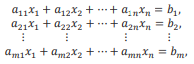

a. Representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio
diario de consumo de cada especie.

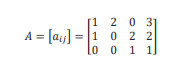

𝐱 = (𝑥𝑗) = [1000, 500, 350, 400], y 𝐛 = (𝑏𝑖) = [3500, 2700, 900]. 

¿Existe suficiente alimento para el consumo promedio diario?

b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema
con el suministro de alimento que cumpla con el consumo?

c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [19]:
import numpy as np

A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
])
x = np.array([1000, 500, 350, 400])
b = np.array([3500, 2700, 900])

# Calculamos el consumo actual
consumo_actual = A @ x

print("Consumo actual de alimentos:", consumo_actual)
print("Suministro disponible:", b)

# Verificamos si hay suficiente alimento
diferencia = b - consumo_actual
suficiente = np.all(diferencia >= 0)

if suficiente:
    print("\nRespuesta a: Sí hay suficiente alimento para el consumo actual.")
    print("Excedentes por tipo de alimento:", diferencia)
else:
    print("\nRespuesta a: No hay suficiente alimento para el consumo actual.")
    print("Déficits por tipo de alimento:", -diferencia[diferencia < 0])

Consumo actual de alimentos: [3200 2500  750]
Suministro disponible: [3500 2700  900]

Respuesta a: Sí hay suficiente alimento para el consumo actual.
Excedentes por tipo de alimento: [300 200 150]


In [20]:
def max_incremento(A, b, x, especie):
    # Calculamos el consumo actual
    consumo_actual = A @ x
    excedente = b - consumo_actual
    
    # Obtenemos la columna de coeficientes para la especie
    a_j = A[:, especie]
    
    # Calculamos el máximo incremento posible
    incrementos = excedente / a_j
    max_incremento = np.min(incrementos[a_j > 0])
    
    return max_incremento

print("\nParte b: Máximo incremento individual por especie")
for j in range(len(x)):
    inc = max_incremento(A, b, x, j)
    print(f"Especie {j+1}: puede aumentar en {inc:.2f} unidades")


Parte b: Máximo incremento individual por especie
Especie 1: puede aumentar en 200.00 unidades
Especie 2: puede aumentar en 150.00 unidades
Especie 3: puede aumentar en 100.00 unidades
Especie 4: puede aumentar en 100.00 unidades


C:\Users\CORE I5\AppData\Local\Temp\ipykernel_17968\1786683539.py:10: RuntimeWarning: divide by zero encountered in divide
  incrementos = excedente / a_j


In [21]:
A_sin_1 = np.delete(A, 0, axis=1)
x_sin_1 = np.delete(x, 0)

# Nuevo consumo sin especie 1
consumo_sin_1 = A_sin_1 @ x_sin_1
excedente_sin_1 = b - consumo_sin_1

print("\nParte c: Extinción de especie 1")
print("Excedente disponible:", excedente_sin_1)

# Calculamos incremento posible para cada especie restante
for j in range(len(x_sin_1)):
    # Sumamos 1 porque eliminamos la columna 0 (especie 1)
    inc = max_incremento(A_sin_1, b, x_sin_1, j)
    print(f"Especie {j+2}: puede aumentar en {inc:.2f} unidades")


Parte c: Extinción de especie 1
Excedente disponible: [1300 1200  150]
Especie 2: puede aumentar en 650.00 unidades
Especie 3: puede aumentar en 150.00 unidades
Especie 4: puede aumentar en 150.00 unidades


C:\Users\CORE I5\AppData\Local\Temp\ipykernel_17968\1786683539.py:10: RuntimeWarning: divide by zero encountered in divide
  incrementos = excedente / a_j


In [22]:
# Eliminamos la especie 2 (columna 1)
A_sin_2 = np.delete(A, 1, axis=1)
x_sin_2 = np.delete(x, 1)

# Nuevo consumo sin especie 2
consumo_sin_2 = A_sin_2 @ x_sin_2
excedente_sin_2 = b - consumo_sin_2

print("\nParte d: Extinción de especie 2")
print("Excedente disponible:", excedente_sin_2)

# Calculamos incremento posible para cada especie restante
for j in range(len(x_sin_2)):
    # Ajustamos el índice porque eliminamos la columna 1 (especie 2)
    especie_original = j if j < 1 else j + 1
    inc = max_incremento(A_sin_2, b, x_sin_2, j)
    print(f"Especie {especie_original+1}: puede aumentar en {inc:.2f} unidades")


Parte d: Extinción de especie 2
Excedente disponible: [1300  200  150]
Especie 1: puede aumentar en 200.00 unidades
Especie 3: puede aumentar en 100.00 unidades
Especie 4: puede aumentar en 100.00 unidades


C:\Users\CORE I5\AppData\Local\Temp\ipykernel_17968\1786683539.py:10: RuntimeWarning: divide by zero encountered in divide
  incrementos = excedente / a_j


### Ejercicio 7

Repita el ejercicio 4 con el método Gauss-Jordan

In [23]:
import numpy as np

# Configurar precisión simple (32 bits)
np.set_printoptions(precision=7, suppress=True)
dtype = np.float32

def gaussian_elimination(A, b):
    """Eliminación Gaussiana con precisión simple"""
    n = len(A)
    Ab = np.hstack([A, b.reshape(-1, 1)]).astype(dtype)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        if max_row != k:
            Ab[[k, max_row]] = Ab[[max_row, k]]
        
        # Eliminación
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            Ab[i,k:] -= factor * Ab[k,k:]
    
    # Sustitución hacia atrás
    x = np.zeros(n, dtype=dtype)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

def gauss_jordan(A, b):
    """Método Gauss-Jordan con precisión simple"""
    n = len(A)
    Ab = np.hstack([A, b.reshape(-1, 1)]).astype(dtype)
    
    for k in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        if max_row != k:
            Ab[[k, max_row]] = Ab[[max_row, k]]
        
        # Normalizar fila pivote
        pivot = Ab[k,k]
        Ab[k,k:] /= pivot
        
        # Eliminación hacia arriba y abajo
        for i in range(n):
            if i != k:
                factor = Ab[i,k]
                Ab[i,k:] -= factor * Ab[k,k:]
    
    return Ab[:,n]

def solve_system(A, b, method='gaussian'):
    """Resuelve el sistema con el método especificado"""
    if method == 'gaussian':
        return gaussian_elimination(A, b)
    else:
        return gauss_jordan(A, b)

def print_solution(x, label):
    """Imprime la solución formateada"""
    print(f"\nSolución para {label}:")
    for i in range(len(x)):
        print(f"x_{i+1} = {x[i]:.7f}")

$-\frac{1}{6}x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 = 9$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8$

$-\frac{1}{2}x_1 + x_2 + 2x_3 = 8$

In [24]:
A_a = np.array([
    [1/4, 1/3, 1/6],
    [1, 1/2, 1/5],
    [1/2, 1, 2]
], dtype=dtype)
b_a = np.array([9, 8, 8], dtype=dtype)

# Soluciones
x_a_gauss = solve_system(A_a, b_a, 'gaussian')
x_a_gj = solve_system(A_a, b_a, 'gauss-jordan')

print_solution(x_a_gauss, "a (Gauss)")
print_solution(x_a_gj, "a (Gauss-Jordan)")


Solución para a (Gauss):
x_1 = -9.9459457
x_2 = 41.6216202
x_3 = -14.3243237

Solución para a (Gauss-Jordan):
x_1 = -9.9459448
x_2 = 41.6216164
x_3 = -14.3243237


$3.333x_1 + 15920x_2 - 10.333x_3 = 15913$

$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$

$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$

In [25]:
A_b = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=dtype)
b_b = np.array([15913, 28.544, 8.4254], dtype=dtype)

# Soluciones
x_b_gauss = solve_system(A_b, b_b, 'gaussian')
x_b_gj = solve_system(A_b, b_b, 'gauss-jordan')

print_solution(x_b_gauss, "b (Gauss)")
print_solution(x_b_gj, "b (Gauss-Jordan)")


Solución para b (Gauss):
x_1 = 0.9997094
x_2 = 1.0000001
x_3 = 1.0001061

Solución para b (Gauss-Jordan):
x_1 = 0.9998865
x_2 = 1.0000001
x_3 = 1.0001063


$x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}$

$\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}$

$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}$

$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}$

In [26]:
A_c = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=dtype)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=dtype)

# Soluciones
x_c_gauss = solve_system(A_c, b_c, 'gaussian')
x_c_gj = solve_system(A_c, b_c, 'gauss-jordan')

print_solution(x_c_gauss, "c (Gauss)")
print_solution(x_c_gj, "c (Gauss-Jordan)")


Solución para c (Gauss):
x_1 = -0.0317474
x_2 = 0.5952567
x_3 = -2.3809996
x_4 = 2.7778091

Solución para c (Gauss-Jordan):
x_1 = -0.0317469
x_2 = 0.5952499
x_3 = -2.3809819
x_4 = 2.7777972


$2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$

$x_1 + 2x_3 - x_4 + x_5 = 2$

$-2x_2 + x_3 + x_4 - x_5 = -5$

$3x_1 + x_2 - 4x_3 + 5x_5 = 6$

$x_1 - x_2 - x_3 + x_4 + x_5 = -3$

In [27]:
A_d = np.array([
    [2, 1, -1, 1, -3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=dtype)
b_d = np.array([7, 2, -5, 6, -3], dtype=dtype)

# Soluciones
x_d_gauss = solve_system(A_d, b_d, 'gaussian')
x_d_gj = solve_system(A_d, b_d, 'gauss-jordan')

print_solution(x_d_gauss, "d (Gauss)")
print_solution(x_d_gj, "d (Gauss-Jordan)")


Solución para d (Gauss):
x_1 = 1.8830409
x_2 = 2.8070176
x_3 = 0.7309940
x_4 = 1.4385961
x_5 = 0.0935672

Solución para d (Gauss-Jordan):
x_1 = 1.8830408
x_2 = 2.8070176
x_3 = 0.7309940
x_4 = 1.4385962
x_5 = 0.0935672
